In [ ]:
# IMPORTS

In [63]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import math
import warnings
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# CREATE DATAFRAME AND DISPLAY HEAD

In [39]:
df = pd.read_csv('Datasets/CC_Fraud_Dataset/creditcard_2023.csv')

In [40]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
# DESCRIBE DISTRIBUTION INFORMATION

In [41]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,568630.0,2.843145e+05,164149.486121,0.000000,142157.250000,284314.500000,426471.750000,568629.000000
V1,568630.0,-5.638058e-17,1.000001,-3.495584,-0.565286,-0.093638,0.832658,2.229046
V2,568630.0,-1.319545e-16,1.000001,-49.966572,-0.486678,-0.135894,0.343555,4.361865
V3,568630.0,-3.518788e-17,1.000001,-3.183760,-0.649299,0.000353,0.628538,14.125834
V4,568630.0,-2.879008e-17,1.000001,-4.951222,-0.656020,-0.073762,0.707005,3.201536
V5,568630.0,7.997245e-18,1.000001,-9.952786,-0.293496,0.081088,0.439737,42.716891
V6,568630.0,-3.958636e-17,1.000001,-21.111108,-0.445871,0.078718,0.497788,26.168402
V7,568630.0,-3.198898e-17,1.000001,-4.351839,-0.283533,0.233366,0.525955,217.873038
V8,568630.0,2.109273e-17,1.000001,-10.756342,-0.192257,-0.114524,0.047299,5.958040
V9,568630.0,3.998623e-17,1.000001,-3.751919,-0.568745,0.092526,0.559262,20.270062


In [ ]:
# CHECKING FOR NULL DATA

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
# VISUALIZE THE NUMBER OF FRAUD TO NON-FRAUD

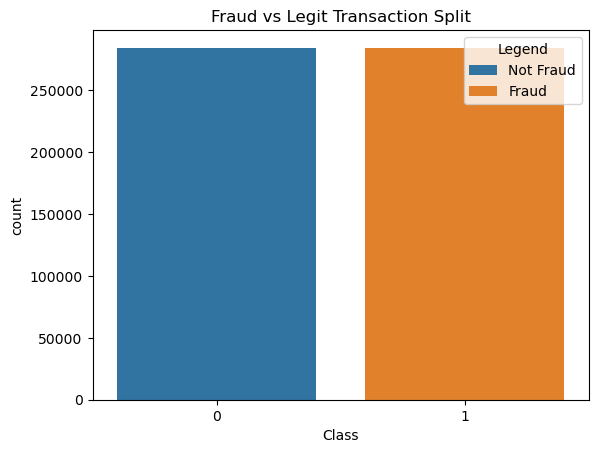

In [43]:
g = sns.countplot(data = df, x = 'Class', dodge=False, hue='Class')
plt.legend(title='Legend', loc='upper right', labels=['Not Fraud', 'Fraud'])
plt.title('Fraud vs Legit Transaction Split')
plt.show(g)

In [44]:
# sns.pairplot(df, hue = 'Class', palette = 'Dark2')

In [ ]:
# DROP ID COLUMN AS IT WILL HAVE NO IMPACT IN THE MODEL

In [45]:
df = df.drop(["id"], axis = 1)


In [46]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
# CORRELATION MATRIX TO IDENTIFY THE FEATURES THAT ARE MOST IMPACTFUL

In [47]:
df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,0.599108,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,-0.621798,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,0.707676,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,-0.712839,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,0.563874,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,0.471000,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,0.678004,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,-0.199995,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,0.748487,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522
V10,0.599108,-0.621798,0.707676,-0.712839,0.563874,0.471000,0.678004,-0.199995,0.748487,1.000000,...,0.037426,-0.150957,-0.056285,0.045935,-0.014045,-0.053684,-0.134907,0.035646,-0.001259,-0.673665


In [ ]:
# CORRELATION OF FEATURES IN DESCENDING ORDER OF IMPORTANCE TO THE TYPE OF CHARGE

In [48]:
df.corrwith(df['Class']).sort_values(ascending=False)

Class     1.000000
V4        0.735981
V11       0.724278
V2        0.491878
V19       0.244081
V27       0.214002
V20       0.179851
V8        0.144294
V21       0.109640
V28       0.102024
V26       0.071052
V25       0.061847
V22       0.014098
V23       0.010255
Amount    0.002261
V15      -0.037948
V13      -0.071105
V24      -0.130107
V5       -0.338639
V18      -0.410091
V6       -0.435088
V17      -0.476377
V7       -0.491234
V1       -0.505761
V16      -0.573511
V9       -0.585522
V10      -0.673665
V3       -0.682095
V12      -0.768579
V14      -0.805669
dtype: float64

In [ ]:
# HEATMAP FOR MORE CORRELATION VISUALIZATION

<Axes: >

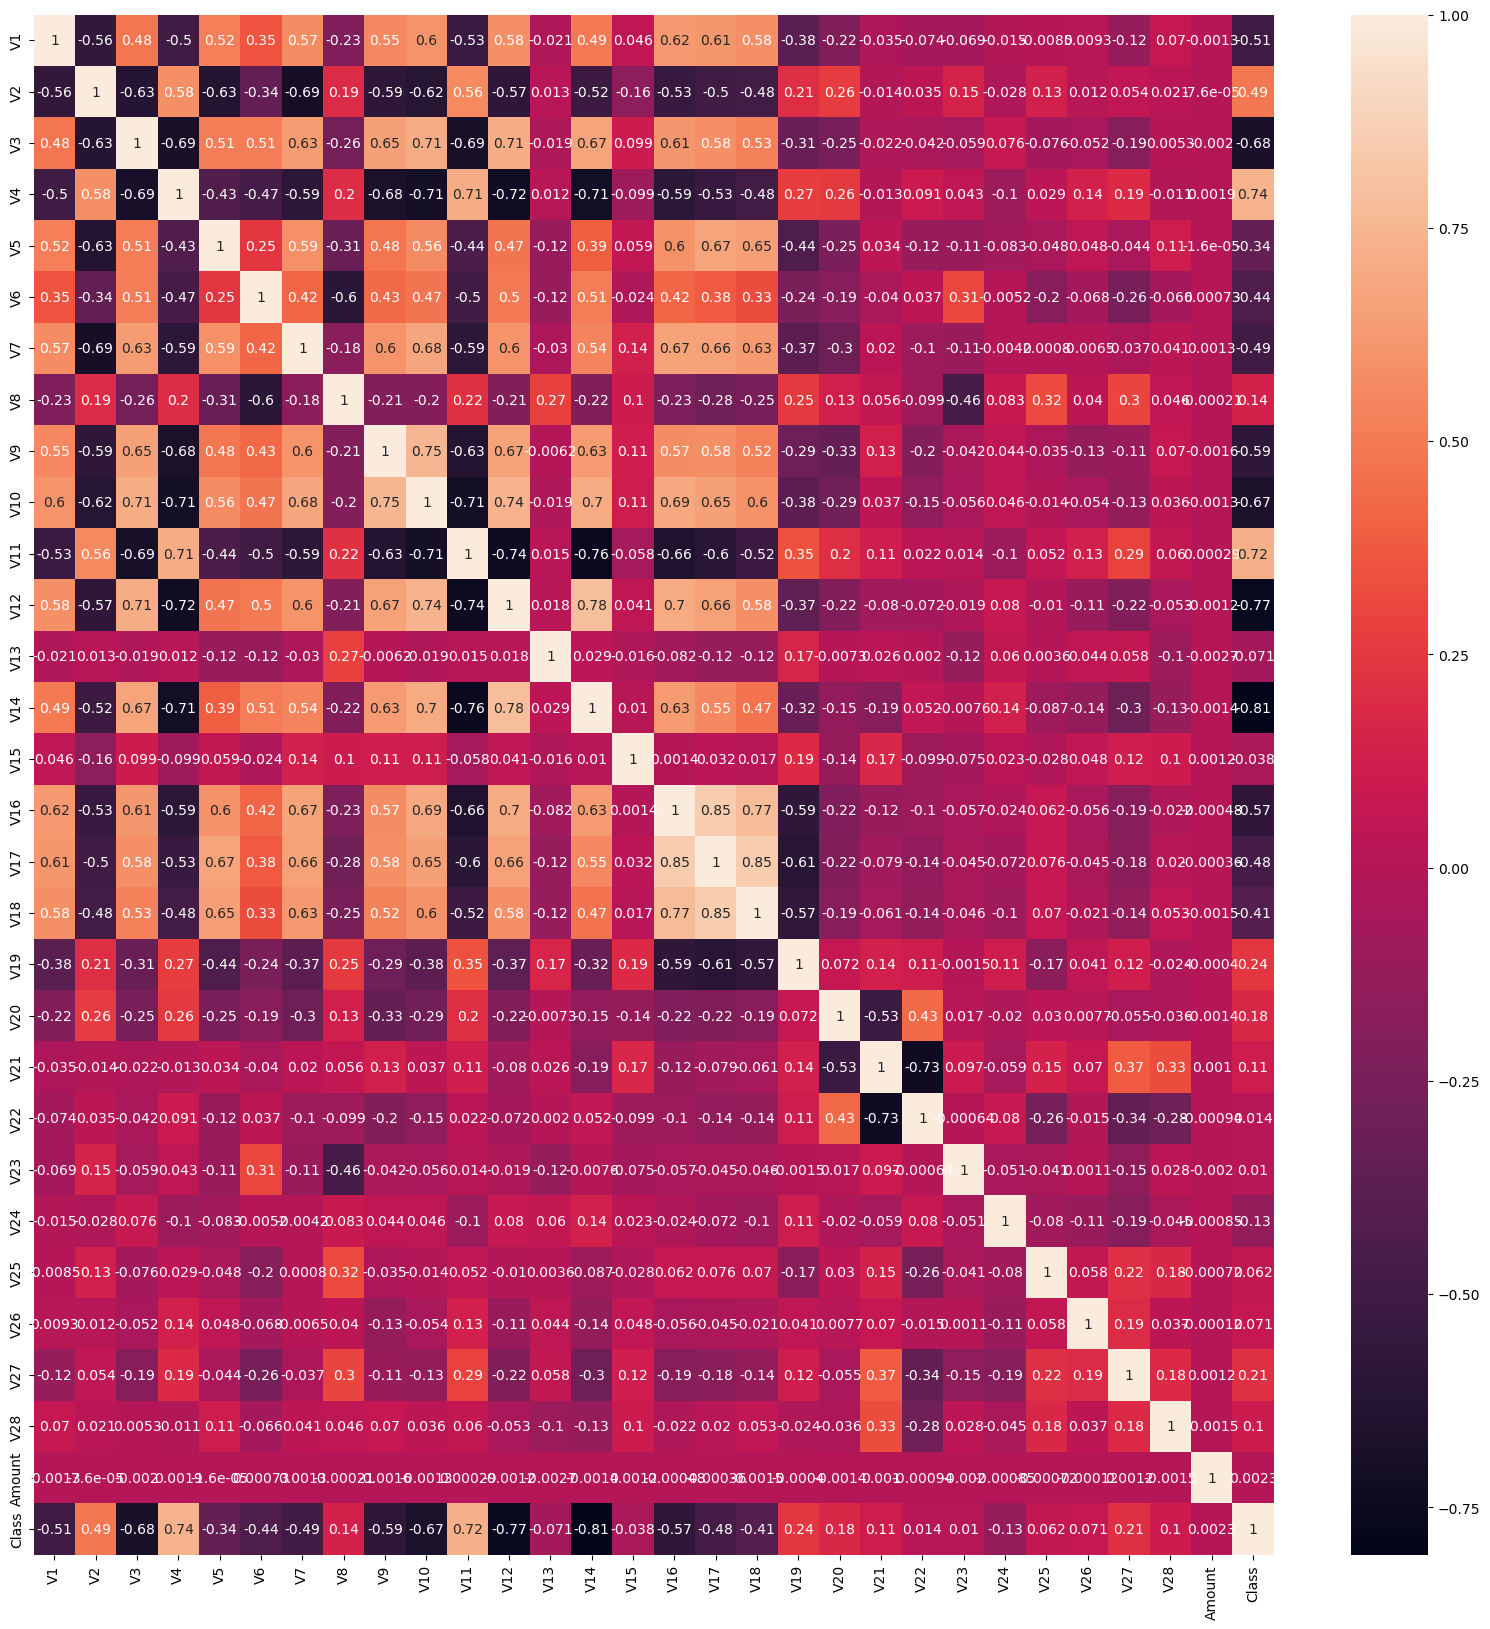

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [ ]:
# CREATE AXIS AND TRAIN TEST SPLIT, PERFORMING SCALING AND TRANSFORMING OF DATA

In [52]:
X = df.drop('Class', axis = 1)
Y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# MODEL WITH RANDOM FOREST CLASSIFIER

In [53]:
forest_model = RandomForestClassifier(n_estimators=50, random_state=101)
forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=101)

In [54]:
forest_pred = forest_model.predict(X_test)
forest_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [56]:
accuracy = accuracy_score(y_test, forest_pred)
print("Accuracy of Random Forest Model: ", accuracy)

Accuracy of Random Forest Model:  0.9999062073170016


In [ ]:
# CONFUSION MATRIX OF RANDOM FOREST CLASSIFIER

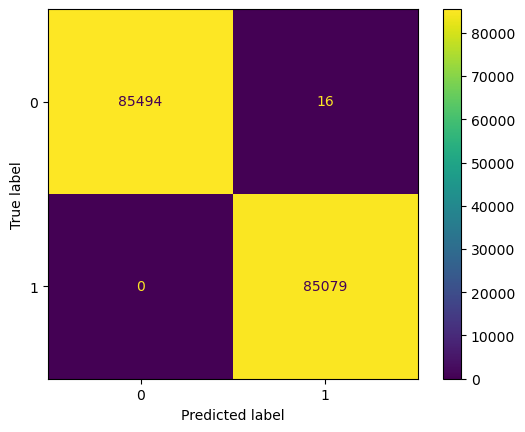

In [58]:
# Initialize Confusion Matrix

cm = confusion_matrix(y_test,forest_pred)

# Dispaly Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# MODEL WITH DECISION TREE CLASSIFIER

In [67]:
tree_model = DecisionTreeClassifier(random_state=101)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [68]:
tree_pred = tree_model.predict(X_test)
tree_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [69]:
accuracy = accuracy_score(y_test, tree_pred)
print("Accuracy of Decision Tree Model: ", accuracy)

Accuracy of Decision Tree Model:  0.9973855289614219


In [70]:
# Display classification report with colors and heading
from colorama import Fore, Back, Style
print("\n" + Back.BLUE + Fore.WHITE + "Classification Report for Random Forest Model" + Style.RESET_ALL)
report = classification_report(y_test, forest_pred, output_dict=True)
for key, value in report.items():
    if key in ['0', '1']:  
        color = Fore.GREEN if value['precision'] > 0.8 else Fore.RED
        print(f"Class {key}:")
        print(f"  Precision: {color}{value['precision']:.2f}{Style.RESET_ALL}")
        color = Fore.GREEN if value['recall'] > 0.8 else Fore.RED
        print(f"  Recall: {color}{value['recall']:.2f}{Style.RESET_ALL}")
        color = Fore.GREEN if value['f1-score'] > 0.8 else Fore.RED
        print(f"  F1-score: {color}{value['f1-score']:.2f}{Style.RESET_ALL}")
        print(f"  Support: {value['support']}")
    else:
        print(key + ":", value)


Classification Report for Random Forest Model
Class 0:
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Support: 85510.0
Class 1:
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Support: 85079.0
accuracy: 0.9999062073170016
macro avg: {'precision': 0.9999059874258183, 'recall': 0.9999064436907964, 'f1-score': 0.9999062067619087, 'support': 170589.0}
weighted avg: {'precision': 0.9999062249523848, 'recall': 0.9999062073170016, 'f1-score': 0.9999062073384027, 'support': 170589.0}


In [ ]:
# CLASSIFICATION REPORTS (PULLED FROM https://www.kaggle.com/code/samanfatima7/credit-card-fraud-detection-achieving-99-acc/notebook)

In [71]:
# Display classification report with colors and heading
from colorama import Fore, Back, Style
print("\n" + Back.BLUE + Fore.WHITE + "Classification Report for Decision Tree Model" + Style.RESET_ALL)
report = classification_report(y_test, tree_pred, output_dict=True)
for key, value in report.items():
    if key in ['0', '1']:  
        color = Fore.GREEN if value['precision'] > 0.8 else Fore.RED
        print(f"Class {key}:")
        print(f"  Precision: {color}{value['precision']:.2f}{Style.RESET_ALL}")
        color = Fore.GREEN if value['recall'] > 0.8 else Fore.RED
        print(f"  Recall: {color}{value['recall']:.2f}{Style.RESET_ALL}")
        color = Fore.GREEN if value['f1-score'] > 0.8 else Fore.RED
        print(f"  F1-score: {color}{value['f1-score']:.2f}{Style.RESET_ALL}")
        print(f"  Support: {value['support']}")
    else:
        print(key + ":", value)


Classification Report for Decision Tree Model
Class 0:
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Support: 85510.0
Class 1:
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Support: 85079.0
accuracy: 0.9973855289614219
macro avg: {'precision': 0.9973851733705617, 'recall': 0.9973882966991396, 'f1-score': 0.9973855236563018, 'support': 170589.0}
weighted avg: {'precision': 0.9973879599098489, 'recall': 0.9973855289614219, 'f1-score': 0.9973855330657948, 'support': 170589.0}


In [59]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test, params):


    grid_model = GridSearchCV(model, params)
    grid_model.fit(X_train, y_train)
    best_params = grid_model.best_params_

    predictions = grid_model.predict(X_test)
    probability = grid_model.predict_proba(X_test)

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    MAE = mean_absolute_error(y_test, predictions)
    MSE = mean_squared_error(y_test, predictions)
    RMSE = np.sqrt(MSE)
    prob = probability

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, MAE, MSE, RMSE]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'MAE', 'MSE', 'RMSE'])
    return eval_df, best_params, prob

In [ ]:
# SET PARAMETERS FOR EACH TYPE OF MODEL 

In [65]:
param_both = {"n_estimators" : [1,5,10,20,30,40,50,60,70,80,90,100], "max_depth": [1,2,3,4,5,6,7,8,9,10]}
param_est = {"n_estimators" : [1,5,10,20,30,40,50,60,70,80,90,100]}
param_depth = {"max_depth": [1,2,3,4,5,6,7,8,9,10]}
param_lgbm = {"learing_rate": [0.01,0.025,0.05,0.075,0.1], "num_iterations" : [10,20,30,40,50,60,70,80,90,100], "max_depth": [1,2,3,4,5,6,7,8,9,10]}

In [ ]:
# RUN MODEL (NOT SURE IF THESE WORK, OR THEY JUST TAKE A LONG TIME TO RUN)

In [66]:

forest_model_result, forest_bestP, RF_prob = train_evaluate_model(forest_model, X_train, y_train, X_test, y_test, param_both)
forest_model_result.index = ['RandomForest']
results = forest_model_result
forest_model_result.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

KeyboardInterrupt: 

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree_results, dt_bestP, dt_prob = train_evaluate_model(decision_tree,X_train, y_train, X_test, y_test, param_depth)

decision_tree_results.index = ['DecisionTree']
results = results.append(decision_tree_results)
decision_tree_results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [ ]:
# ANALYZE RESULTS

In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))